<a href="https://colab.research.google.com/github/manishaachary13/Airline_referral_prediction/blob/main/Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 **Project Title: Airline Passenger Referral Prediction** ✈️

## **Project Description**

The airline industry is highly competitive, and customer referrals play a major role in influencing brand reputation and business growth. This project aims to predict whether a passenger will **recommend an airline** based on their flight experience.

By analyzing **customer ratings, flight details, and text reviews**, we will build a machine learning model that helps airlines understand what factors drive customer referrals.

## **Business Problem & Objective** 📊

🔹 Business Context:

Airlines rely heavily on positive customer experiences to build brand loyalty.
Identifying key drivers of referral behavior helps airlines improve services and reduce negative feedback.

🔹 Business Objective:

This project aims to build a predictive model that accurately forecasts whether a passenger will recommend the airline (via referral) based on various customer experience factors. This insight will help the airline enhance customer satisfaction, improve services, and boost referrals.


Project Objective

🔹 Primary Goal:

Develop a machine learning model to predict passenger referral likelihood using structured ratings and unstructured text reviews.

🔹 Secondary Goals:
✅ Perform Exploratory Data Analysis (EDA) to uncover customer satisfaction trends.
✅ Compare airlines to identify top performers vs. low performers.
✅ Analyze sentiment in customer reviews for deeper insights.
✅ Provide business recommendations for improving airline services.

Why Is This Project Important?

💡 For Airlines:

Helps in improving customer experience based on data-driven insights.

Reduces negative feedback & enhances brand reputation.

Increases customer loyalty and repeat bookings.

💡 For Data Science & AI Industry:

Combines structured data (ratings) & unstructured data (text reviews).

Uses Natural Language Processing (NLP) + Machine Learning, making it an advanced AI solution.

Can be extended to other businesses like hotels, e-commerce, and banking.

Key Project Deliverables

📌 **Data Preprocessing & Cleaning** → Handle missing values, feature engineering

📌 **EDA & Sentiment Analysis** → Extract key customer insights

📌 **Machine Learning Model** → Predict referral likelihood with high accuracy

📌 **Model Explainability** (SHAP, Feature Importance) → Understand key factors

📌 **Business Report & Recommendations** → Data-driven insights for airlines

📌 **Interactive Dashboard** (Power BI/Tableau) → Visualize trends across airlines

## **Data Description**

The dataset comprises various features related to passenger demographics, travel experiences, and satisfaction levels. Below is a brief description of the features:
* **overall:** Overall rating given by the passenger.
* **seat_comfort:** Rating for seat comfort.
* **cabin_service:** Rating for cabin service.
* **food_bev:** Rating for food and beverages.
* **entertainment:** Rating for entertainment facilities.
* **ground_service:** Rating for ground service.
* **value_for_money:** Rating for value for money.
* **traveller_type:** Type of traveller (e.g., Business, Leisure).
* **cabin:** Type of cabin class (e.g., Economy, Business).
* **recommended:** Target variable indicating whether the passenger would recommend the airline.
* **review_date:** The date when the review was given.
* **year:** The year when the review was given.

#### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importing all models from sklearn to be used in model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing  metrics for evaluation of models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

#### Load Dataset

In [2]:


# GitHub raw file URL (Modify this with the correct raw file link)
github_url = "https://raw.githubusercontent.com/manishaachary13/Airline_referral_prediction/main/data_airline_reviews.xlsx"

# Load the dataset from GitHub
try:
    airline = pd.read_excel(github_url)
except Exception as e:
    e



#### Dataset First View

In [3]:
airline.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Dataset Shape

In [4]:
airline.shape

(131895, 17)

#### Dataset Column names

In [5]:
airline.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

#### Dataset Info

In [6]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Dataset Description

In [7]:
airline.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Cheching for Duplications

In [8]:
airline.duplicated().sum()

np.int64(70711)

#### If there is any Missing Values

In [9]:
missing_values = airline.isnull().sum()

In [10]:
missing_values

,0
airline,65948
overall,67878
author,65948
review_date,65948
customer_review,65948
aircraft,112177
traveller_type,92140
cabin,68592
route,92169
date_flown,92262


#### Visualising Missing Value (%)

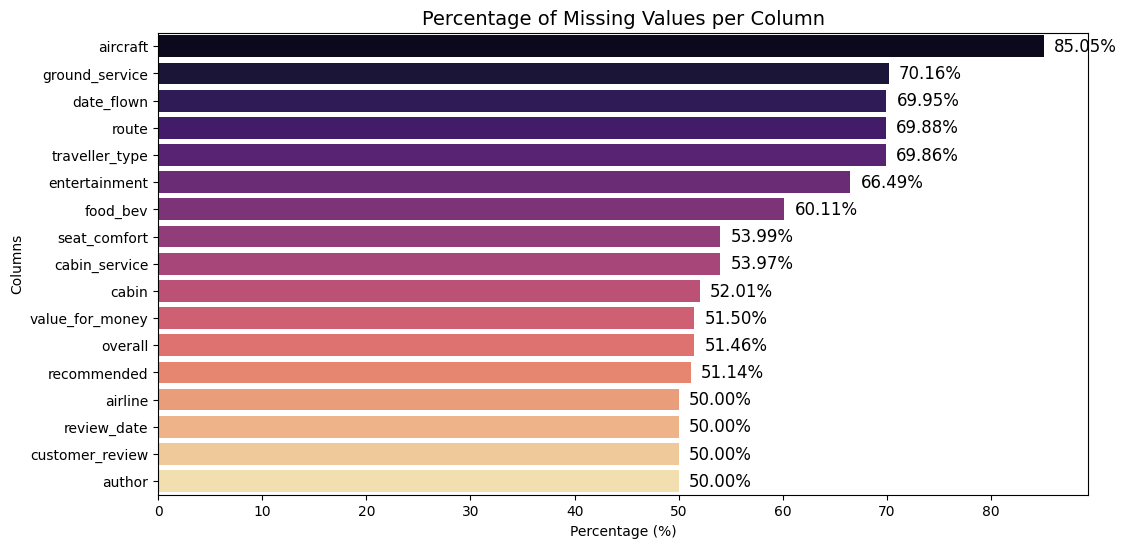

In [11]:
# Bar plot of missing values percentage
# Set plot size
plt.figure(figsize=(12, 6))

# Calculate missing value percentage
missing_percentage = (airline.isnull().sum() / len(airline)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Create bar plot
ax = sns.barplot(x=missing_percentage, y=missing_percentage.index, palette="magma")

# Add percentage labels on bars
for index, value in enumerate(missing_percentage):
    ax.text(value + 1, index, f"{value:.2f}%", va="center", fontsize=12)

# Add labels and title
plt.title("Percentage of Missing Values per Column", fontsize=14)
plt.xlabel("Percentage (%)")
plt.ylabel("Columns")

# Show the plot
plt.show()



#### Count of Unique Values

In [12]:
airline.nunique()

,0
airline,81
overall,10
author,44069
review_date,3015
customer_review,61172
aircraft,2088
traveller_type,4
cabin,4
route,24549
date_flown,63


#### Target Varibale unique values

In [13]:
airline.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

## What we have done so far?

1️⃣ Dataset Shape: (131,895 rows, 17 columns)

2️⃣ Columns Present: 17 (includes airline, overall, customer_review, traveller_type, etc.)

3️⃣ Data Types:
* Numerical Columns: Ratings (overall, seat_comfort, cabin_service, etc.)
* Categorical Columns: airline, traveller_type, cabin, recommended
* Text Columns: customer_review (for sentiment analysis)

4️⃣ Missing Values:
* Some columns have a large percentage of missing values (e.g., aircraft, route, date_flown).
* Some are partially missing but still usable (seat_comfort, cabin_service).

5️⃣ Duplicates: 70,711 duplicate rows detected

6️⃣ Unique Values Count:
* airline: 81 unique airlines
* traveller_type: 4 categories
* route: 24,549 unique routes
* recommended: Binary classification (Yes/No)

## **Data Preprocessing**

#### Drop Duplicates

In [14]:
airline_df = airline.drop_duplicates()

#### Dataste Shape After Drop Duplicates

In [15]:
airline_df.shape

(61184, 17)

#### Handling Missing Values

In [16]:
# Calculate the percentage of missing values
missing_percent = (airline_df.isnull().sum() / len(airline_df)) * 100

# Select columns with more than 70% missing values
cols_to_drop = missing_percent[missing_percent > 70].index

# Drop these columns
df_cleaned = airline_df.drop(columns=cols_to_drop)

# Display new shape after dropping columns
df_cleaned.shape, cols_to_drop


((61184, 17), Index([], dtype='object'))

In [17]:
# 2️⃣ Impute missing values for numerical columns using median
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

# 3️⃣ Fill missing categorical values with the most frequent category (mode)
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[cat_cols] = df_cleaned[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [18]:
df_cleaned.shape

(61184, 17)

In [19]:
# Check if there are any missing values left
missing_values_after = df_cleaned.isnull().sum().sum()
df_cleaned.shape, missing_values_after

((61184, 17), np.int64(0))

#### Data Type Conversion

In [20]:
# Convert date columns to datetime format
df_cleaned['review_date'] = pd.to_datetime(df_cleaned['review_date'], errors='coerce')
df_cleaned['date_flown'] = pd.to_datetime(df_cleaned['date_flown'], errors='coerce')
# Extract year from 'date_flown' column
df_cleaned['year_flown'] = df_cleaned['date_flown'].dt.year


# Find the most common year
most_frequent_year = df_cleaned['year_flown'].mode()[0]

# Fill NaN values with the most frequent year
df_cleaned['year_flown'].fillna(most_frequent_year, inplace=True)

# Convert to integer
df_cleaned['year_flown'] = df_cleaned['year_flown'].astype(int)


In [21]:
df_cleaned['recommended'] = df_cleaned['recommended'].replace({'yes': 1, 'no': 0})
df_cleaned['recommended'].value_counts()

,count
recommended,
0,32691
1,28493


In [22]:
df_cleaned.shape

(61184, 18)

# **EDA**


The EDA involves visualizing distributions, detecting outliers, and identifying correlations between variables.

Key insights include:
* Identifying most influential features on recommendations.
* Understanding trends and patterns in satisfaction ratings.
* Distribution analysis of categorical features.

#### **Chart - 1:**

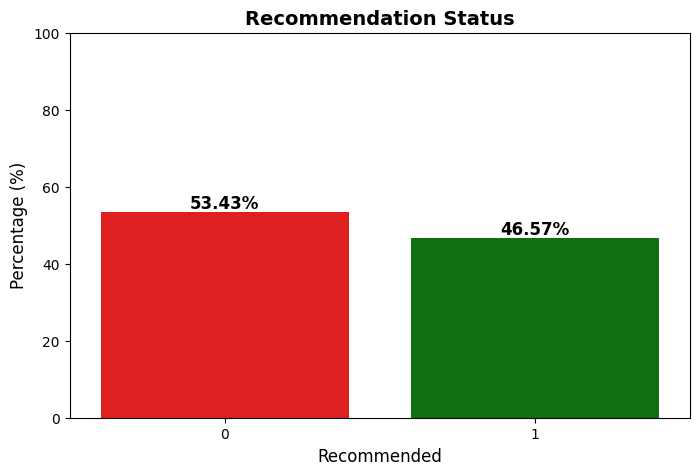

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the recommendations
recommend_counts = df_cleaned['recommended'].value_counts(normalize=True) * 100

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=recommend_counts.index, y=recommend_counts.values, palette=['red', 'green'])

# Add percentage labels
for i, v in enumerate(recommend_counts.values):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontsize=12, fontweight='bold')

plt.title("Recommendation Status", fontsize=14, fontweight='bold')
plt.xlabel("Recommended", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.ylim(0, 100)
plt.show()


**📌 Why this chart?**

A bar chart is used to compare the percentage of customers who recommended the airline (1) versus those who did not (0). This visualization helps quickly assess overall customer satisfaction and recommendation trends.

**🔍 2. Insights from the chart:**
* 53.43% of customers did not recommend the airline, while 46.57% did.
* A higher percentage of negative recommendations suggests that more customers are dissatisfied with their experience.
* The gap between positive and negative recommendations is not too large, indicating mixed customer sentiments.



#### **Chart - 2:**

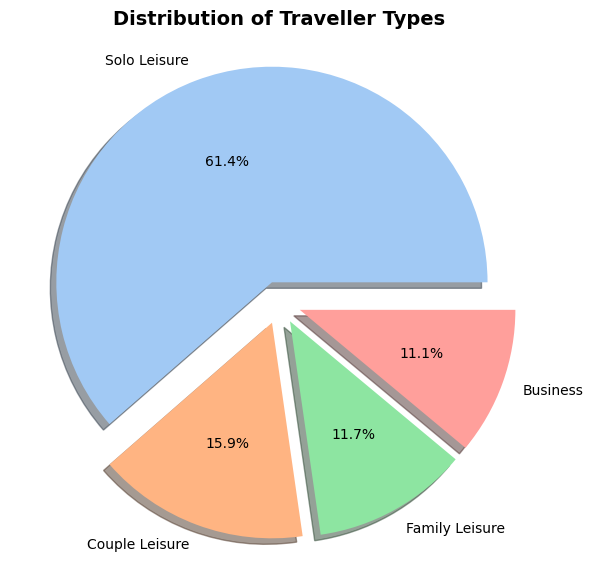

In [24]:
# Count the traveller types
traveller_counts = df_cleaned['traveller_type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
sizes =traveller_counts.values
explode = [0.1]*len(sizes)

plt.pie(traveller_counts, labels=traveller_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"),explode=explode, shadow=True )

plt.title("Distribution of Traveller Types", fontsize=14, fontweight='bold')
plt.show()


**📌 Why this chart?**

A pie chart is ideal for showing proportions of different traveler types. It helps visualize the dominance of one category over others in a clear and intuitive way.

**🔍 2. Insights from the chart:**
* Solo Leisure travelers make up the largest segment (61.4%), meaning most passengers travel alone for leisure.
* Couple Leisure (15.9%) and Family Leisure (11.7%) together make up around 27.6%, indicating a significant number of leisure travelers prefer flying with companions.
* Business travelers (11.1%) are the smallest segment, suggesting the airline is not the primary choice for business travel.


#### **Chart - 3:**

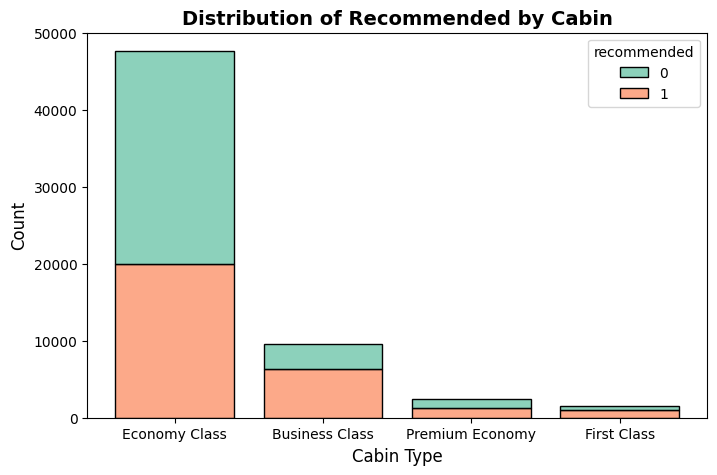

In [25]:
# Create a stacked bar chart for recommendation status by cabin
plt.figure(figsize=(8, 5))
sns.histplot(data=df_cleaned, x="cabin", hue="recommended", multiple="stack", shrink=0.8, palette="Set2")

plt.title("Distribution of Recommended by Cabin", fontsize=14, fontweight='bold')
plt.xlabel("Cabin Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


**✅ 1. Why we chose this particular chart?**

A stacked bar chart is effective for comparing recommendations across different cabin types while showing the proportion of positive (1) and negative (0) recommendations.

**🔍 2. Insights from the chart:**
* Economy Class has the highest number of reviews but also the highest count of non-recommendations (green section). This suggests dissatisfaction among many economy passengers.
* Business Class has a relatively higher proportion of positive recommendations compared to economy.
* Premium Economy and First Class have significantly fewer reviews, but their positive recommendation rates appear to be better than economy.


#### **Chart - 4:**

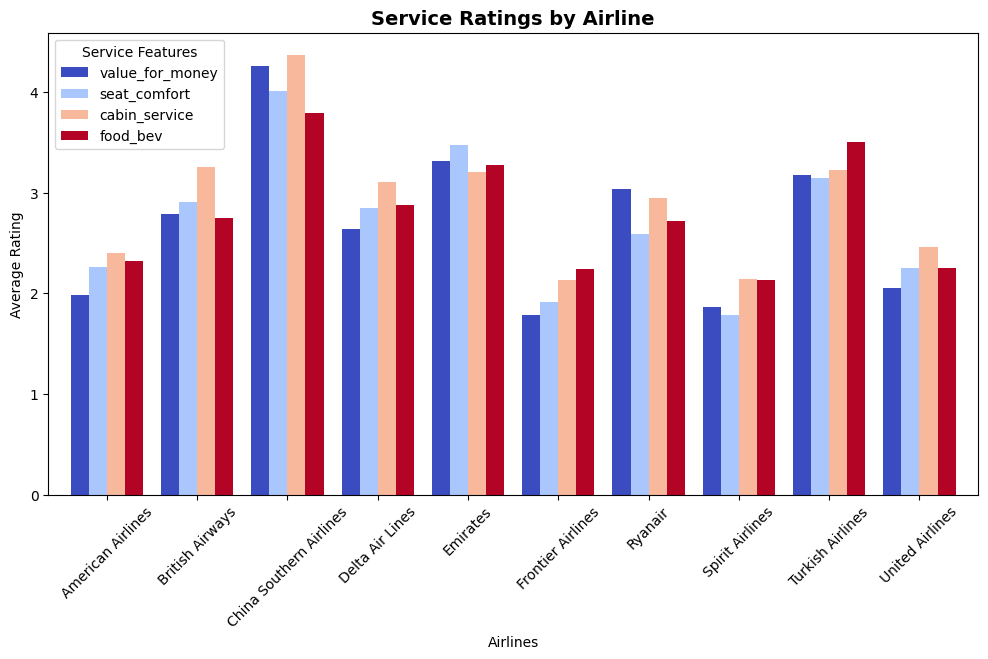

In [26]:
# Select top airlines
top_airlines = df_cleaned['airline'].value_counts().nlargest(10).index
df_top = df_cleaned[df_cleaned['airline'].isin(top_airlines)]

# Aggregate ratings
ratings = df_top.groupby('airline')[['value_for_money', 'seat_comfort', 'cabin_service', 'food_bev']].mean()

# Plot grouped bar chart
ratings.plot(kind='bar', figsize=(12, 6), colormap="coolwarm", width=0.8)
plt.title("Service Ratings by Airline", fontsize=14, fontweight='bold')
plt.ylabel("Average Rating")
plt.xlabel("Airlines")
plt.xticks(rotation=45)
plt.legend(title="Service Features")
plt.show()


**✅ 1. Why we chose this particular chart?**

A grouped bar chart is ideal for comparing multiple service features (e.g., value for money, seat comfort, cabin service, and food/beverage) across different airlines. It helps visualize which airlines excel in specific areas and where they need improvement.

**🔍 2. Insights from the chart:**
* China Southern Airlines and Turkish Airlines have the highest overall ratings across all service categories.
* Spirit Airlines and Frontier Airlines have the lowest ratings in multiple service features, indicating poor customer satisfaction.
* British Airways and Delta Air Lines have moderate ratings, with cabin service scoring slightly higher than other features.
* Food & beverage ratings vary widely across airlines, with some airlines scoring significantly lower than others.



#### **Chart - 5:**

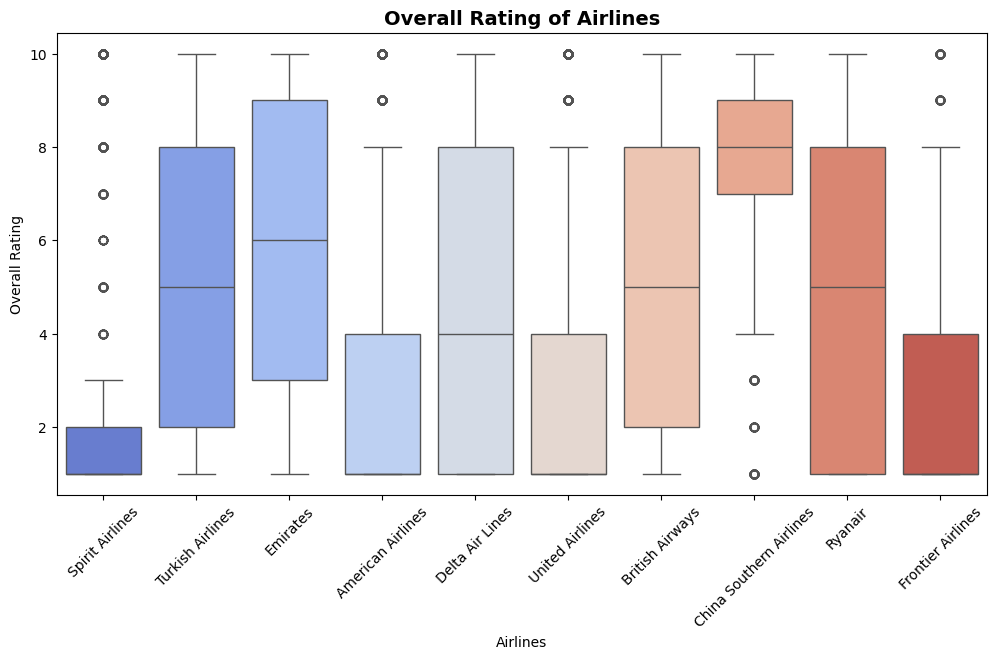

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x="airline", y="overall", palette="coolwarm")

plt.title("Overall Rating of Airlines", fontsize=14, fontweight='bold')
plt.xlabel("Airlines")
plt.ylabel("Overall Rating")
plt.xticks(rotation=45)
plt.show()


**✅ 1. Why we chose this particular chart?**
A box plot is useful for visualizing the distribution of ratings for different airlines, including median ratings, variability, and outliers. It helps to identify airlines with consistent ratings versus those with a wide range of feedback.

**🔍 2. Insights from the chart:**
* Spirit Airlines and Frontier Airlines have the lowest median ratings, with most ratings clustered at the bottom (around 1-3), indicating poor overall customer satisfaction.
* Turkish Airlines, British Airways, and China Southern Airlines have high median ratings and a smaller range of lower scores, indicating strong and consistent positive reviews.
* Ryanair shows a wide variation in ratings, suggesting that some customers are highly satisfied while others are highly dissatisfied.
* American Airlines and United Airlines have a median rating of around 4-5, with some higher ratings but also a significant number of low ratings.
* Outliers are present in multiple airlines, indicating that some passengers have extreme positive or negative experiences.


#### **Chart - 6:**

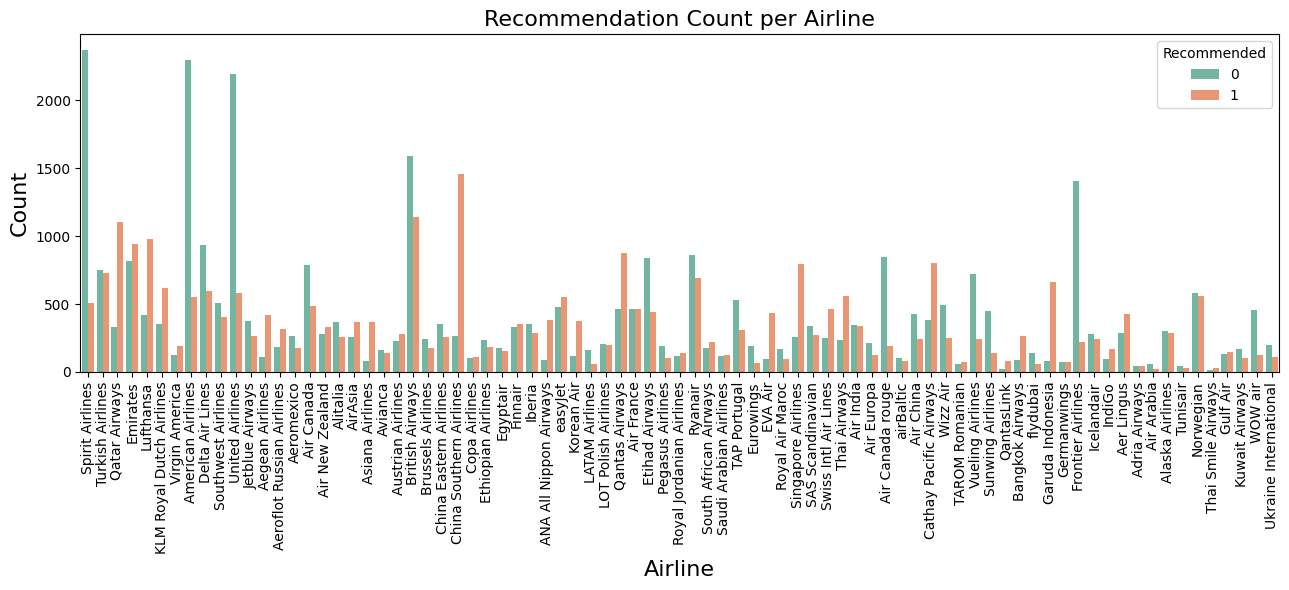

In [28]:
plt.figure(figsize=(13, 6))
sns.countplot(x='airline', hue='recommended', data=df_cleaned,palette='Set2')
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Airline',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Recommendation Count per Airline',fontsize=16)
plt.legend(title='Recommended')
plt.tight_layout()
plt.show()

**✅ 1. Why we chose this particular chart?**

A stacked bar chart is effective in showing the proportion of customers who recommend or do not recommend an airline. It provides a clear visual comparison across multiple airlines.

**🔍 2. Insights from the chart:**
* Several airlines have significantly more negative recommendations (green bars higher than orange bars), indicating dissatisfaction.
* China Southern Airlines, Austrian Airlines, and Turkish Airlines have relatively higher positive recommendations, suggesting a good customer experience.
* American Airlines, Delta Airlines, and United Airlines have more negative recommendations, indicating a need for service improvement.
* Low-cost airlines (e.g., Ryanair, Spirit Airlines, Frontier Airlines) show a high number of non-recommendations, likely due to issues with service quality, hidden fees, or flight delays.
* Some airlines have a nearly equal proportion of recommendations and non-recommendations, suggesting inconsistent customer experiences.


#### **Chart - 7:**

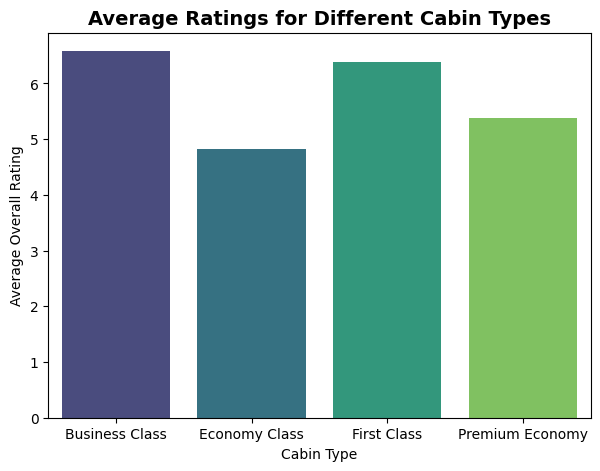

In [29]:
# Average rating by cabin type
cabin_ratings = df_cleaned.groupby("cabin")["overall"].mean()

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x=cabin_ratings.index, y=cabin_ratings.values, palette="viridis")

plt.title("Average Ratings for Different Cabin Types", fontsize=14, fontweight='bold')
plt.ylabel("Average Overall Rating")
plt.xlabel("Cabin Type")
plt.show()


**✅ 1. Why this chart was chosen?**

A bar chart is ideal for comparing the average ratings across different cabin types. It provides a clear view of how different classes perform in terms of customer satisfaction.

**🔍 2. Insights from the chart:**
* Business Class has the highest average rating (~6.5), indicating a premium experience with better comfort, service, and amenities.
* First Class is slightly behind Business Class but still highly rated, suggesting a positive experience.
* Economy Class has the lowest rating (~4.8), which could be due to cramped seating, service limitations, or overall lower comfort.
* Premium Economy falls between Economy and Business Class, indicating a moderate level of customer satisfaction.


#### **Chart - 8:**

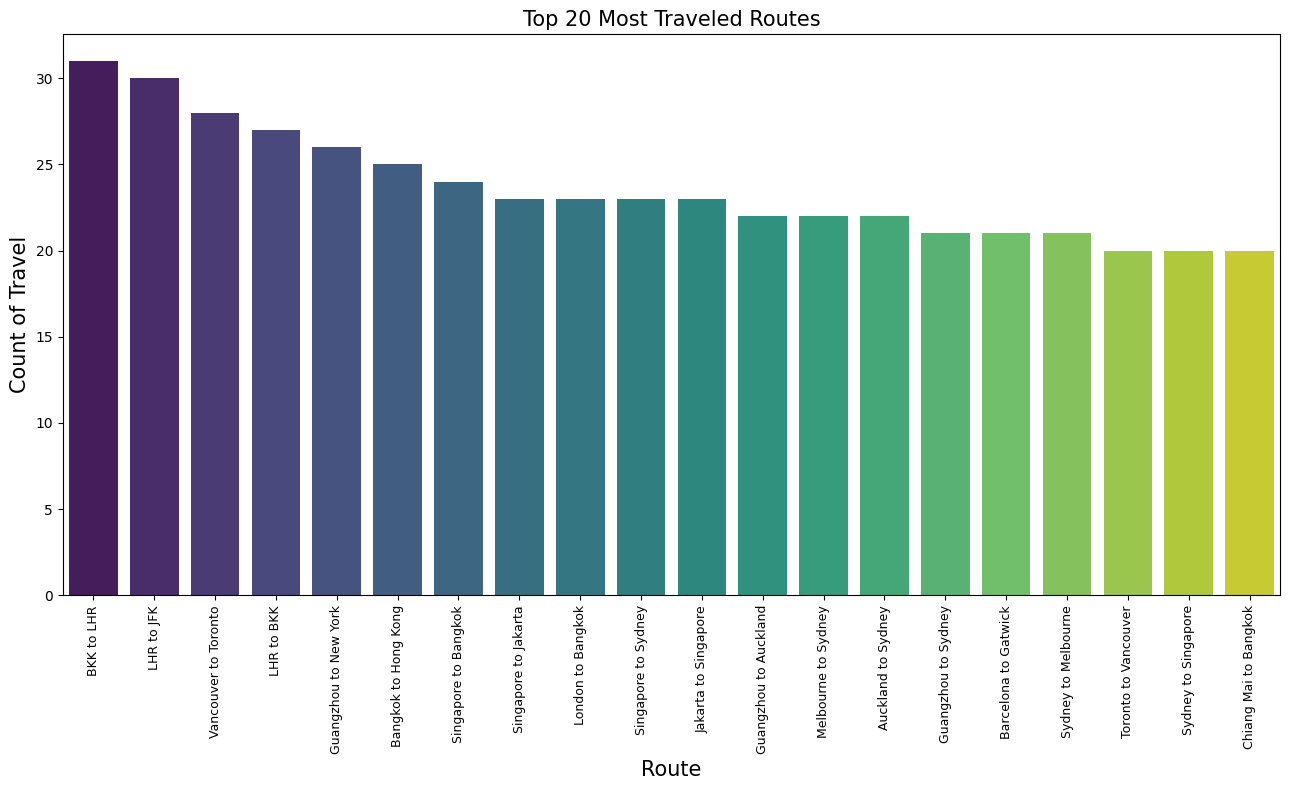

In [30]:
# Count top 20 routes
# Count the occurrences of each unique route
route_counts = airline_df['route'].value_counts()

# Select the top 50 most traveled routes
top_20_routes = route_counts.head(20)

# Set the figure size
plt.figure(figsize=(13, 8))

# Create a bar plot for the top 10 most traveled routes
sns.barplot(x=top_20_routes.index, y=top_20_routes.values, palette='viridis')

plt.xlabel('Route',fontsize=15)
plt.ylabel('Count of Travel',fontsize=15)
plt.title('Top 20 Most Traveled Routes',fontsize=15)
plt.xticks(rotation=90,fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


**✅ 1. Why this chart was chosen?**

A bar chart is an effective way to display the most traveled flight routes, providing a clear ranking of routes based on travel count. The color gradient enhances readability and highlights variations among different routes.

**🔍 2. Insights from the chart:**
* BKK (Bangkok) to LHR (London Heathrow) is the most traveled route, followed by LHR to JFK (London to New York) and Vancouver to Toronto.
* Major travel hubs such as Bangkok, London, New York, Singapore, and Sydney dominate the list, indicating their high connectivity and demand.
* Multiple intra-Asia routes (e.g., Singapore to Jakarta, Bangkok to Hong Kong) show high travel frequency, highlighting strong regional air travel demand.
* Several Australia routes (e.g., Melbourne-Sydney, Auckland-Sydney) also appear, indicating high domestic or near-domestic travel.


#### **Chart - 9:**

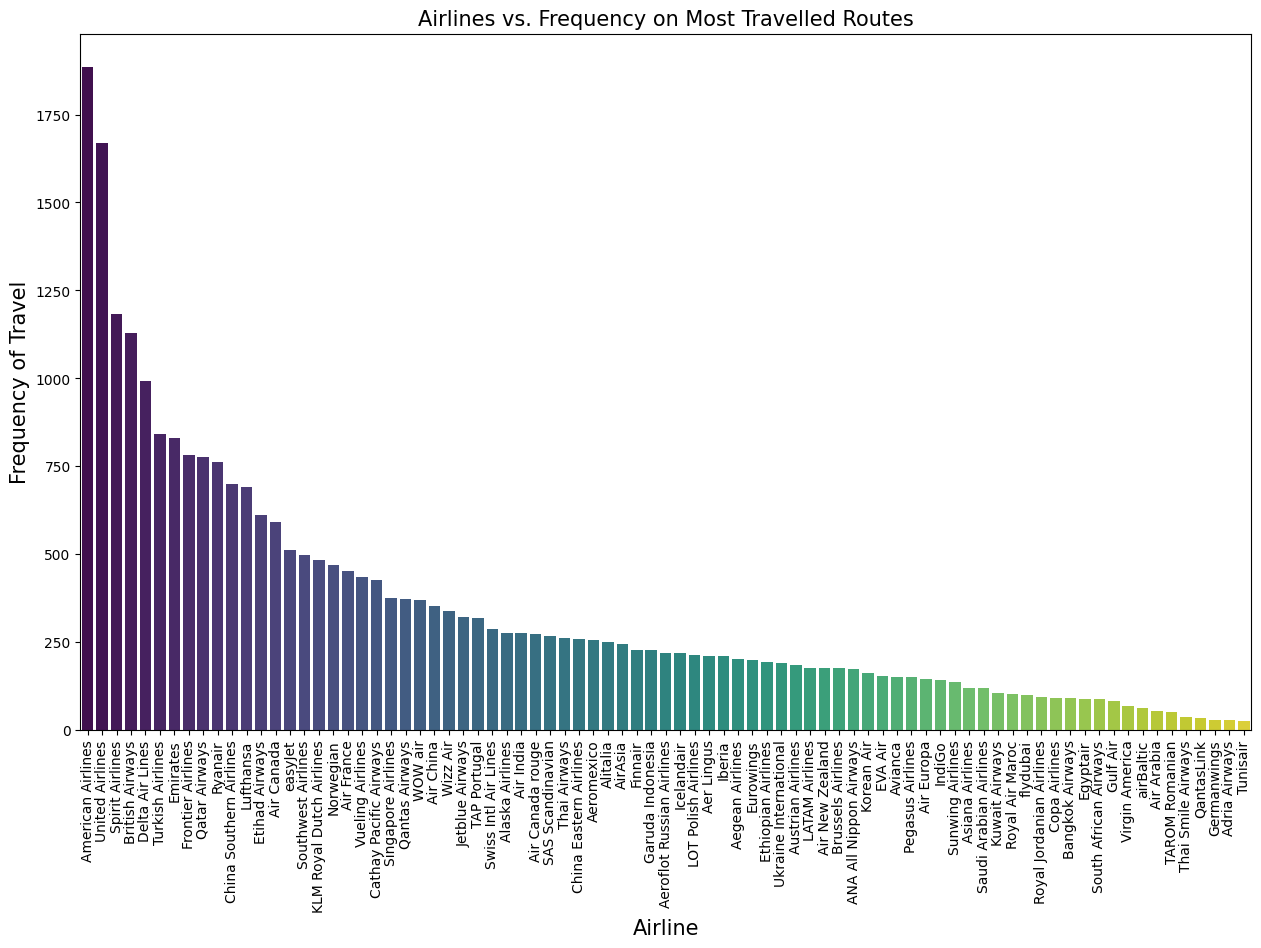

In [31]:
# Count the number of unique routes traveled by each airline
airline_route_counts = df_cleaned.groupby('airline')['route'].nunique().reset_index()

# Sort the airlines by the number of routes in descending order
airline_route_counts = airline_route_counts.sort_values(by='route', ascending=False)

# Set the figure size
plt.figure(figsize=(13, 8))

# Create a count plot for airlines and the number of routes traveled
sns.barplot(x='airline', y='route', data=airline_route_counts, palette='viridis')

plt.xlabel('Airline',fontsize=15)
plt.ylabel('Frequency of Travel',fontsize=15)
plt.title('Airlines vs. Frequency on Most Travelled Routes',fontsize=15)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=90,fontsize=10)
plt.show()

**✅ 1. Why this chart was chosen?**

A bar chart was chosen to visualize the frequency of travel by different airlines. It effectively highlights which airlines operate the most flights on popular routes, making it easy to compare their market presence.

**🔍 2. Insights from the chart:**
* American Airlines has the highest travel frequency, followed by United Airlines and Delta Airlines, indicating their dominance in air travel.
* European and Middle Eastern carriers like British Airways, Turkish Airlines, and Qatar Airways also show high flight frequencies, emphasizing their strong international connectivity.
* Asian airlines such as China Southern Airlines, Japan Airlines, and Singapore Airlines have significant travel counts, reflecting the growing demand for flights within Asia.
* Airlines with lower frequencies are likely regional carriers or those operating in niche markets.


#### **Chart - 10:**

<Figure size 1200x600 with 0 Axes>

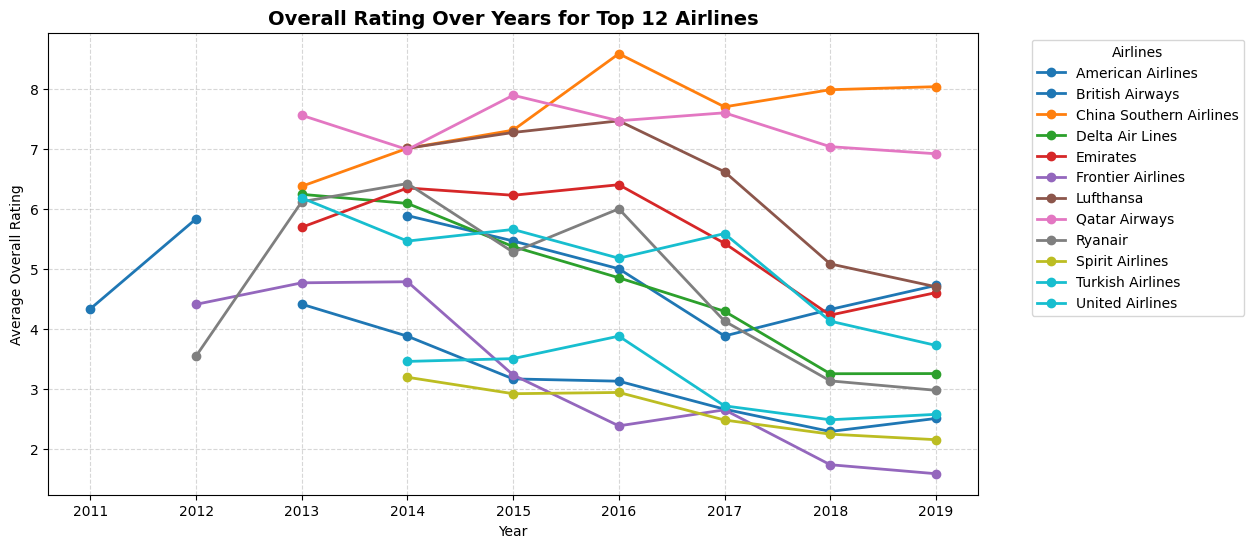

In [32]:
# Convert review_date to datetime and extract the year
df_cleaned['review_date'] = pd.to_datetime(df_cleaned['review_date'])
df_cleaned['year'] = df_cleaned['review_date'].dt.year

# Select top 12 airlines
top_12_airlines = df_cleaned['airline'].value_counts().nlargest(12).index
df_top_12 = df_cleaned[df_cleaned['airline'].isin(top_12_airlines)]

# Aggregate average rating per year per airline
rating_trends = df_top_12.groupby(['year', 'airline'])['overall'].mean().unstack()

# Plot line chart
plt.figure(figsize=(12, 6))
rating_trends.plot(marker='o', colormap='tab10', linewidth=2, figsize=(12, 6))

plt.title("Overall Rating Over Years for Top 12 Airlines", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Average Overall Rating")
plt.legend(title="Airlines", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


**✅ 1. Why this chart was chosen?**

A line chart was chosen because it effectively tracks changes in airline ratings over time, helping to identify trends in customer satisfaction and service quality.

**🔍 2. Insights from the chart:**
* Qatar Airways and Emirates consistently have higher ratings, indicating strong service quality.
* China Southern Airlines shows a notable peak around 2016, suggesting a period of significant improvement.
* Lufthansa's rating declines after 2016, possibly due to operational issues or customer dissatisfaction.
* Low-cost airlines like Spirit Airlines and Frontier Airlines have consistently lower ratings, reflecting budget-friendly but potentially less satisfying services.
* Ryanair experiences fluctuations, indicating inconsistent service quality over the years.


#### **Chart - 11:**

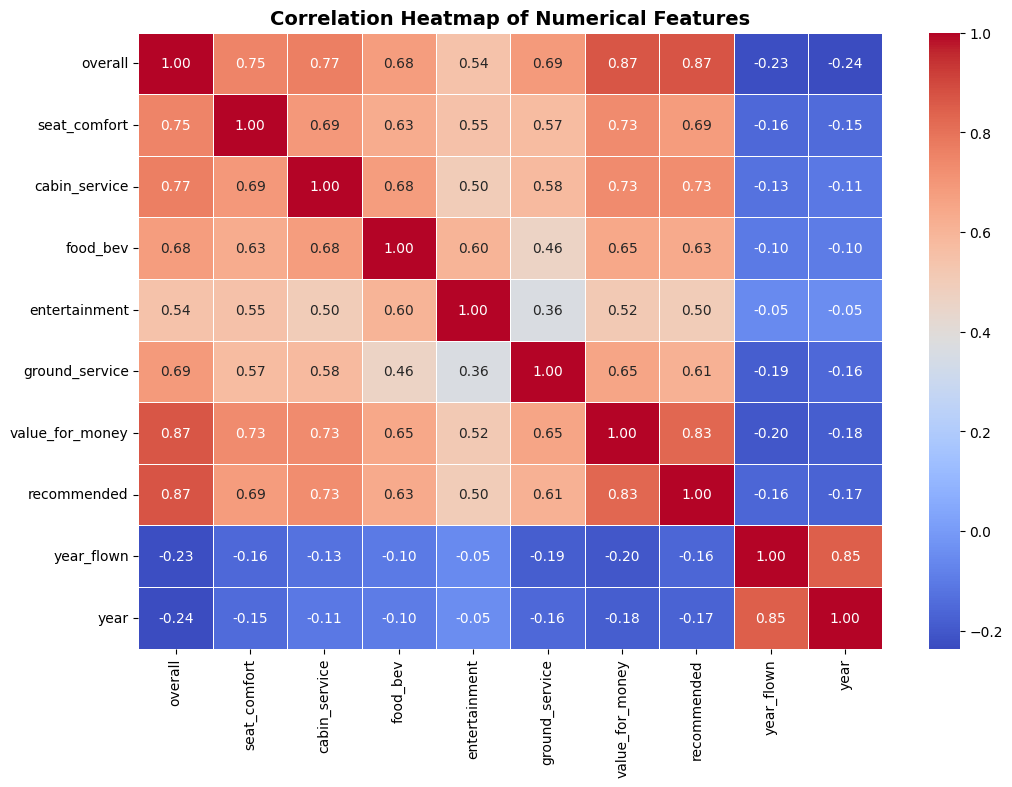

In [33]:
# Select only numerical columns for correlation
numerical_data = df_cleaned.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight='bold')
plt.show()


**✅ 1. Why this heatmap was chosen?**

A correlation heatmap was chosen to visually represent the relationships between different numerical features in the dataset. It helps identify strong, moderate, or weak correlations between airline service factors and overall ratings.

**🔍 2. Insights from the heatmap:**
* Strong Positive Correlations:
 - overall rating is highly correlated with value_for_money (0.87) and recommended (0.87), indicating that passengers who find the airline valuable are more likely to give a higher rating and recommend it.
 - seat_comfort (0.75) and cabin_service (0.77) are also strong contributors to the overall rating.
* Moderate Positive Correlations:
 - food_bev (0.68) and ground_service (0.69) also impact overall rating but to a slightly lesser extent.
 - entertainment has a weaker correlation (0.54), suggesting that in-flight entertainment is less critical to overall satisfaction.
* Weak or Negative Correlations:
 - year_flown (-0.23) and year (-0.24) have a negative correlation with overall rating, suggesting that recent years may have seen declining passenger satisfaction.

### 📌 **Summary of Key Insights & Recommendations from Charts**



1. **Top Airlines by Route Frequency:** American Airlines, United Airlines, and Delta Airlines operate the most frequent routes, suggesting a competitive advantage in market presence.  

2. **Overall Airline Ratings Over Time:** Some airlines, like Qatar Airways and Emirates, maintain consistently high ratings, while others, like Ryanair and Frontier Airlines, show a decline. Focus on improving service quality and customer experience.  

3. **Declining Ratings in Recent Years:** Negative correlation between `year_flown` and `overall rating` suggests passenger satisfaction has decreased over time. Airlines should investigate and address declining service quality.  

4. **Key Factors Affecting Customer Satisfaction:** `Value for money`, `cabin service`, and `seat comfort` have the strongest correlation with overall ratings. Airlines should prioritize these areas for improvement.  

5. **Lower Impact of Entertainment on Satisfaction:** In-flight entertainment has a weaker correlation with overall ratings, meaning airlines should focus more on essential services like comfort, service, and value.  

6. **Customer Recommendations Are Strongly Linked to Ratings:** Customers who feel they get good value and comfort are more likely to recommend an airline, highlighting the importance of these factors in customer retention.  

7. **Airlines with Declining Performance Need Attention:** Airlines with downward trends in ratings should analyze customer feedback to identify and address key pain points.  

8. **Competitive Benchmarking is Essential:** Comparing performance with top competitors like Emirates, Qatar Airways, and Turkish Airlines can help identify areas of improvement.  

9. **Food & Beverage Service Matters:** While not the strongest factor, meal quality still significantly impacts overall ratings. Consistency in food and beverage service can improve satisfaction.  

10. **Market Strategy Adjustment:** Airlines with lower ratings should focus on improving their core services rather than adding less impactful features like entertainment to enhance customer experience.  


 # **Statistical Evaluation (Hypothesis Testing & Feature Analysis)**
Before proceeding with model building, we need to validate key insights using statistical evaluation. This helps confirm whether certain variables significantly influence passenger referrals.

In [34]:
# Perform Statistical Test to obtain P-Value

# Dropping the Null Value from the "recommended" & "seat_comfort" column
recommended=df_cleaned['recommended'].dropna()
seat_comfort=df_cleaned['seat_comfort'].dropna()

# Convert the data in 'recommended' columns to numeric
recommended=recommended.replace({'yes': 1, 'no': 0})

# Picking out 100 Random Samples to perform t-test
sample_recommended=recommended.sample(100,random_state=42)
sample_seat_comfort=seat_comfort.sample(100,random_state=42)

# Perform t-test
t_statistic, p_value = stats.ttest_ind(sample_seat_comfort, sample_recommended)

# Set the significance level (alpha)
alpha = 0.05

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Compare p-value with alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in seat comfort ratings.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in seat comfort ratings.")

t-statistic: 18.29586422141835
p-value: 1.984429866078955e-44
Reject the null hypothesis. There is a significant difference in seat comfort ratings.


In [35]:

# Define a threshold year to distinguish recent and earlier years
threshold_year = 2019

# Split the data into two groups: recent and earlier years
recent_years = df_cleaned[df_cleaned['year'] >= threshold_year]['overall']
earlier_years = df_cleaned[df_cleaned['year'] < threshold_year]['overall']

# Dropping the null value
recent_years=recent_years.dropna()
earlier_years=earlier_years.dropna()

# Picking 100 random samples to perform t-test
random_recent_years=recent_years.sample(100,random_state=42)
random_earlier_years=earlier_years.sample(100,random_state=42)

# Perform a t-test to compare the average overall ratings
t_statistic, p_value = stats.ttest_ind(random_recent_years, random_earlier_years)

# Set the significance level (alpha)
alpha = 0.05

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Compare p-value with alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. Reviews from recent years are more critical of airline services compared to reviews from earlier years.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in review ratings between recent and earlier years.")


t-statistic: -3.4558000509511078
p-value: 0.0006712741718305248
Reject the null hypothesis. Reviews from recent years are more critical of airline services compared to reviews from earlier years.


In [36]:
# Making copy of original dataframe
df=df_cleaned.copy()

In [37]:
# Columns to use later

df=airline_df[['overall','traveller_type', 'cabin','seat_comfort','cabin_service', 'food_bev',
               'entertainment', 'ground_service','value_for_money', 'recommended']]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61184 entries, 0 to 131894
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          59401 non-null  float64
 1   traveller_type   37540 non-null  object 
 2   cabin            58705 non-null  object 
 3   seat_comfort     56211 non-null  float64
 4   cabin_service    56240 non-null  float64
 5   food_bev         48341 non-null  float64
 6   entertainment    40230 non-null  float64
 7   ground_service   37169 non-null  float64
 8   value_for_money  59327 non-null  float64
 9   recommended      59761 non-null  object 
dtypes: float64(7), object(3)
memory usage: 5.1+ MB


In [39]:
df.isnull().sum()

,0
overall,1783
traveller_type,23644
cabin,2479
seat_comfort,4973
cabin_service,4944
food_bev,12843
entertainment,20954
ground_service,24015
value_for_money,1857
recommended,1423


In [40]:
# Handling Missing Values

# Imputing numerical column with mean using Sklearn Simple Imputer method
from sklearn.impute import SimpleImputer

# Columns to impute
numeric_column=['overall', 'seat_comfort', 'cabin_service','food_bev', 'entertainment', 'ground_service', 'value_for_money']
categorical_column=['traveller_type', 'cabin']

# Create instance of Simple Imputer with mean strategy
numeric_imputer=SimpleImputer(strategy='mean')
categorical_imputer=SimpleImputer(strategy='most_frequent')

# Fitting the imputer method
df[numeric_column]=numeric_imputer.fit_transform(df[numeric_column])
df[categorical_column]=categorical_imputer.fit_transform(df[categorical_column])

# Applying dropna() method on target variable
df.dropna(subset='recommended',inplace=True)

In [41]:
df.isnull().sum()

,0
overall,0
traveller_type,0
cabin,0
seat_comfort,0
cabin_service,0
food_bev,0
entertainment,0
ground_service,0
value_for_money,0
recommended,0


In [42]:
df.duplicated().sum()

np.int64(31419)

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df.duplicated().sum()

np.int64(0)

#### Handling outliers and Encoding

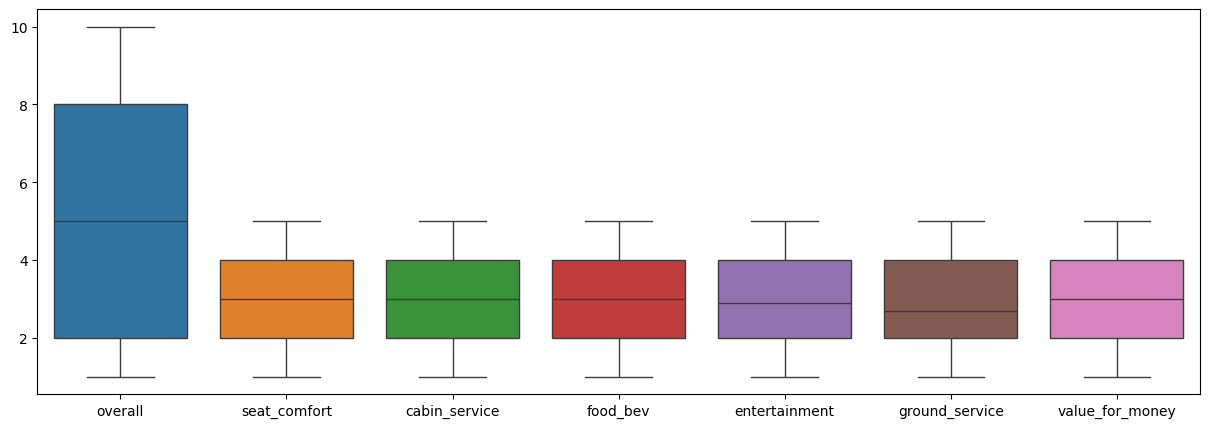

In [45]:
# Handling Outliers
plt.figure(figsize=(15,5))
sns.boxplot(df)
plt.show()

In [46]:
# Encode your categorical columns

# Binary Encoding Target Variable
df['recommended']=df['recommended'].replace({'yes': 1, 'no': 0})

In [47]:

# Applying Ordinal Encoding to cabin column
df['cabin']=df['cabin'].replace({'Economy Class':0, 'Premium Economy':1, 'Business Class' : 2,'First Class':3})


In [48]:

# Applying One Hot Encoding to Traveller_Type column
ohe=pd.get_dummies(df['traveller_type'],drop_first=True)


In [49]:

# Concatenating the encoded feature with original dataframe
df=pd.concat([df,ohe],axis=1)

# Dropping traveller_type column from the dataframe
df=df.drop('traveller_type',axis=1)

In [50]:
df.head()

,overall,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Couple Leisure,Family Leisure,Solo Leisure
1,7.0,0,4.0,5.0,4.0,4.0,2.0,4.0,1,False,False,False
3,2.0,0,4.0,1.0,1.0,1.0,1.0,1.0,0,False,True,False
5,3.0,0,1.0,4.0,1.0,3.0,1.0,2.0,0,False,False,False
7,10.0,0,4.0,5.0,5.0,5.0,5.0,5.0,1,False,False,True
9,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,False,False,True


#### Feature Scaling

In [51]:
# Manipulate Features to minimize feature correlation and create new features

# Checking Multicollinearity

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]
    return vif

# Select columns for which VIF is calculated
selected_columns = [col for col in df.describe().columns if col not in ['recommended']]

# Selecting the columns from DataFrame
selected_data = df[selected_columns]

# Calculate VIF for the selected columns
vif_result = calculate_vif(selected_data)

# Sort the VIF result DataFrame by VIF in descending order
vif_result_sorted = vif_result.sort_values(by='VIF', ascending=False)

print(vif_result_sorted)

          Features    VIF
7  value_for_money  14.19
0          overall  12.08
3    cabin_service  10.71
2     seat_comfort  10.13
4         food_bev   9.76
6   ground_service   8.35
5    entertainment   7.63
1            cabin   1.45


In [52]:
# Select your features wisely to avoid overfitting

# Identify columns with high VIF
high_vif_cols = vif_result[vif_result['VIF'] > 12]['Features']

# Remove columns with high VIF
df.drop(high_vif_cols, axis=1, inplace=True)
df.head()

,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,recommended,Couple Leisure,Family Leisure,Solo Leisure
1,0,4.0,5.0,4.0,4.0,2.0,1,False,False,False
3,0,4.0,1.0,1.0,1.0,1.0,0,False,True,False
5,0,1.0,4.0,1.0,3.0,1.0,0,False,False,False
7,0,4.0,5.0,5.0,5.0,5.0,1,False,False,True
9,0,1.0,1.0,1.0,1.0,1.0,0,False,False,True


#### Normalizing the Data

In [53]:
# Scaling your data

# Normalizing data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_df = pd.DataFrame(sc.fit_transform(df))
scaled_df.columns = df.columns

#### Splitting the Dataset

In [54]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=scaled_df.drop('recommended',axis=1)
y=scaled_df['recommended']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [55]:
print(X_train.shape)
print(X_test.shape)

(22673, 9)
(5669, 9)


In [56]:
df['recommended'].value_counts()

,count
recommended,
0,15200
1,13142


# **Model Building And Evaluation**

The following models were built and evaluated to determine the best-performing model:
* **Logistic Regression:**
A baseline model providing good interpretability and fast computation.
* **Random Forest:**
An ensemble method offering higher accuracy through bagging and feature importance insights.

#### **Logistic Regression**

In [73]:
# ML Model Implementation

# Applying Logistic Regression
model_lr=LogisticRegression(fit_intercept=True, max_iter=1000)

# Fit the Algorithm
model_lr.fit(X_train,y_train)

# Predict on the model
train_class_preds = model_lr.predict(X_train)
test_class_preds = model_lr.predict(X_test)

# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8426322057072289
The accuracy on test data is  0.8493561474686894


#### **Random Forest Classifier**

In [74]:
# Random Forest Regressor
model_rf=RandomForestClassifier()

# fit the model
model_rf.fit(X_train,y_train)

# Predict on the model
train_preds_rf = model_rf.predict(X_train)
test_preds_rf = model_rf.predict(X_test)

# Get the accuracy scores
train_rf_accuracy = accuracy_score(train_preds_rf,y_train)
test_rf_accuracy = accuracy_score(test_preds_rf,y_test)

print("The accuracy on train data is ", train_rf_accuracy)
print("The accuracy on test data is ", test_rf_accuracy)

The accuracy on train data is  0.9110836677987033
The accuracy on test data is  0.8216616687246427


#### **Random Forest Model with Hyperparameter Tuning**

In [75]:
# ML Model -  Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
max_features = [0.2,0.6,1.0]
max_depth = [2,8,None]
max_samples = [0.5,0.75,1.0]


param_grid = {'max_features': max_features,
              'max_depth': max_depth,
            'max_samples':max_samples}
# Fit the Algorithm
model_rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = model_rf,
                       param_grid = param_grid,
                       cv = 3,
                       verbose=2,
                       n_jobs = -1)
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0]},
             verbose=2)

In [76]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'max_depth': 8, 'max_features': 1.0, 'max_samples': 0.5}
0.8450580095697736


In [77]:
# Predict on the model
train_tuned_rf_preds = rf_grid.predict(X_train)
test_tuned_rf_preds = rf_grid.predict(X_test)

In [78]:
# Get the accuracy scores
train_accuracy_tuned_rf = accuracy_score(train_tuned_rf_preds,y_train)
test_accuracy_tuned_rf = accuracy_score(test_tuned_rf_preds,y_test)

print("The accuracy on train data is ", train_accuracy_tuned_rf)
print("The accuracy on test data is ", test_accuracy_tuned_rf)

The accuracy on train data is  0.8574074890839324
The accuracy on test data is  0.8481213617922032


In [79]:
# Applying Cross Validation on Random Forest Model
scores=cross_val_score(model_rf,X_train,y_train,cv=10,scoring='roc_auc')
cv_score=scores.mean()
print("Cross Validation Score is: ",cv_score)

Cross Validation Score is:  0.8923381435731782


In [80]:
# Visualizing evaluation Metric Score chart after Hyperparameter Tuning
print("Training Data")
print(classification_report(y_train, train_tuned_rf_preds))
print("\n")
print("Testing Data")
print(classification_report(y_test, test_tuned_rf_preds))

Training Data
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87     12170
         1.0       0.85      0.84      0.85     10503

    accuracy                           0.86     22673
   macro avg       0.86      0.86      0.86     22673
weighted avg       0.86      0.86      0.86     22673



Testing Data
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      3030
         1.0       0.84      0.83      0.84      2639

    accuracy                           0.85      5669
   macro avg       0.85      0.85      0.85      5669
weighted avg       0.85      0.85      0.85      5669



#### **SVM(Support Vectore Machine) Classifier**

In [81]:
# ML Model - 3 Implementation
## SVM Classifier
model_svc = SVC()

# fit the model
model_svc.fit(X_train,y_train)

SVC()

In [82]:
# Predict on the model
train_preds_svc = model_svc.predict(X_train)
test_preds_svc = model_svc.predict(X_test)

In [83]:
# Get the accuracy scores
train_svc_accuracy = accuracy_score(train_preds_svc,y_train)
test_svc_accuracy = accuracy_score(test_preds_svc,y_test)

print("The accuracy on train data is ", train_svc_accuracy)
print("The accuracy on test data is ", test_svc_accuracy)

The accuracy on train data is  0.8485864243814228
The accuracy on test data is  0.8537660963132828


#### **SVM Classifier with Hyperarameter Tuning**

In [84]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_grid = {'C':[0.01,0.1,1],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']}


# Fit the Algorithm
model_svc = SVC()
svc_grid = GridSearchCV(estimator = model_svc,
                       param_grid = param_grid,
                       cv = 3,
                       verbose=2,
                       n_jobs = -1)

print(svc_grid.fit(X_train,y_train))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)


In [85]:
print(svc_grid.best_params_)
print(svc_grid.best_score_)

{'C': 0.1, 'kernel': 'rbf'}
0.8465134852513506


In [86]:
# Predict on the model
train_tuned_svc_preds = svc_grid.predict(X_train)
test_tuned_svc_preds = svc_grid.predict(X_test)

In [87]:
# Get the accuracy scores
train_accuracy_tuned_svc = accuracy_score(train_tuned_svc_preds,y_train)
test_accuracy_tuned_svc = accuracy_score(test_tuned_svc_preds,y_test)

print("The accuracy on train data is ", train_accuracy_tuned_svc)
print("The accuracy on test data is ", test_accuracy_tuned_svc)

The accuracy on train data is  0.8485423190579103
The accuracy on test data is  0.8564120656200388


In [88]:
# Applying Cross Validation on XGBoost Classifier Model
scores=cross_val_score(model_svc,X_train,y_train,cv=10,scoring='roc_auc')
cv_score=scores.mean()
print("Cross Validation Score is: ",cv_score)

Cross Validation Score is:  0.9148618552950445


In [89]:
# Visualizing evaluation Metric Score chart after Hyperparameter Tuning
print("Training Data")
print(classification_report(y_train, train_tuned_svc_preds))
print("\n")
print("Testing Data")
print(classification_report(y_test, test_tuned_svc_preds))

Training Data
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86     12170
         1.0       0.85      0.82      0.83     10503

    accuracy                           0.85     22673
   macro avg       0.85      0.85      0.85     22673
weighted avg       0.85      0.85      0.85     22673



Testing Data
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      3030
         1.0       0.86      0.82      0.84      2639

    accuracy                           0.86      5669
   macro avg       0.86      0.85      0.86      5669
weighted avg       0.86      0.86      0.86      5669



## **Visualizing the Actual Vs Predicted Value of Each Model**

#### Logistic Regression

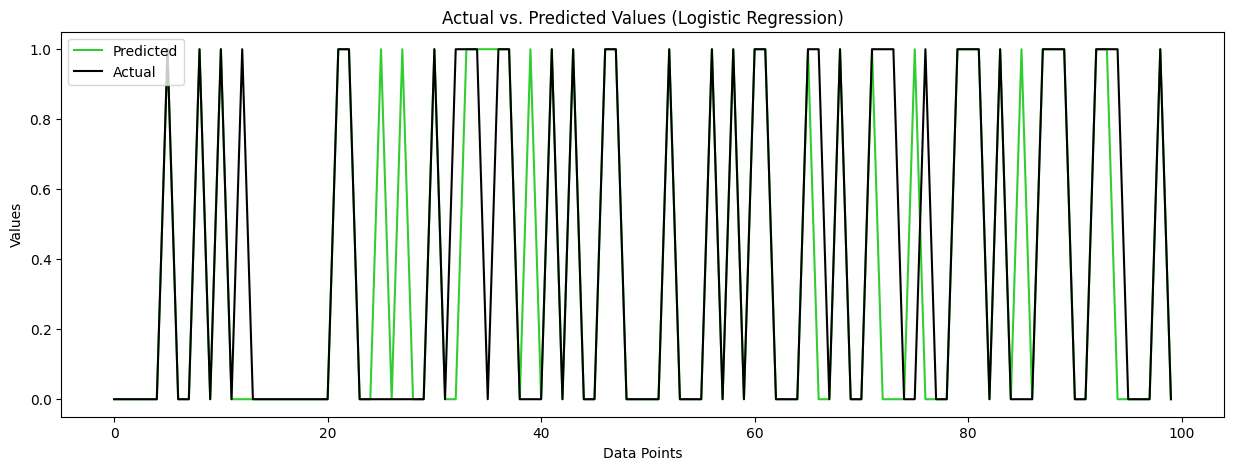

In [90]:
# Visualizing actual vs predicted value
plt.figure(figsize=(15, 5))

# Plotting the predicted values for the specific range
plt.plot(test_class_preds[100:200], label="Predicted", color='limegreen')

# Plotting the actual values for the specific range
plt.plot(np.array(y_test[100:200]), label="Actual", color='black')

plt.legend(loc='upper left')
plt.title("Actual vs. Predicted Values (Logistic Regression)")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.show()


#### Random Forest Classifier

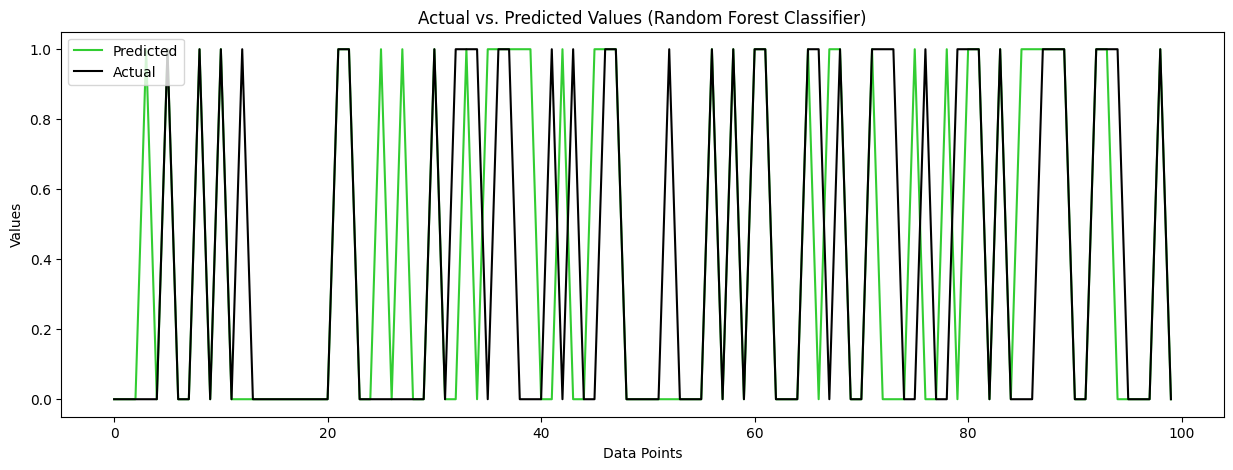

In [91]:
# Visualizing actual vs predicted value

plt.figure(figsize=(15, 5))

# Plotting the predicted values for the specific range
plt.plot(test_preds_rf[100:200],label="Predicted",color='limegreen')


# Plotting the actual values for the specific range
plt.plot(np.array(y_test[100:200]),label="Actual",color='black')

plt.legend(loc='upper left')
plt.title("Actual vs. Predicted Values (Random Forest Classifier)")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.show()


#### SVM Classifier

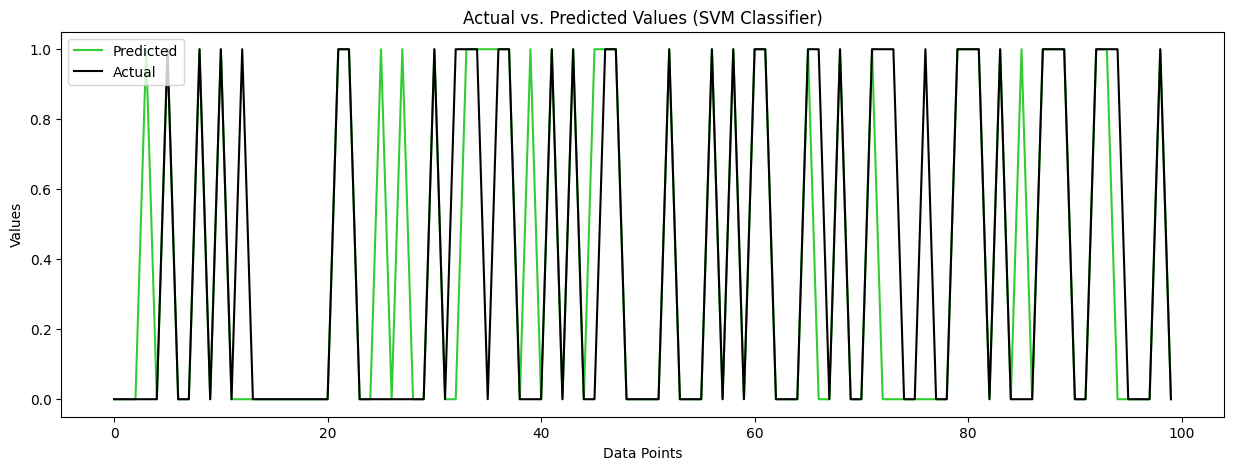

In [92]:
# Visualizing the Predicted vs Actual Graph
plt.figure(figsize=(15, 5))

# Plotting the predicted values for the specific range
plt.plot(test_preds_svc[100:200],label="Predicted",color='limegreen')


# Plotting the actual values for the specific range
plt.plot(np.array(y_test[100:200]),label="Actual",color='black')

plt.legend(loc='upper left')
plt.title("Actual vs. Predicted Values (SVM Classifier)")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.show()

### Confusion Matrix

#### Logistic Regression

[]

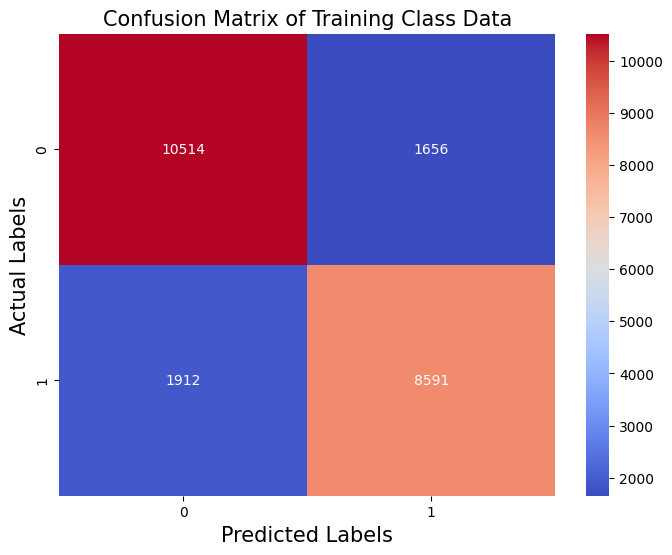

In [93]:
# Plot the confusion matrix of Training Class

plt.figure(figsize=(8,6))
confuse_matrix_train_lr = confusion_matrix(y_train,train_class_preds)

ax= plt.subplot()
sns.heatmap(confuse_matrix_train_lr, annot=True, fmt = 'd',ax = ax,cmap='coolwarm')
ax.set_xlabel('Predicted Labels',fontsize=15)
ax.set_ylabel('Actual Labels',fontsize=15)
ax.set_title('Confusion Matrix of Training Class Data',fontsize=15)
plt.plot()

[]

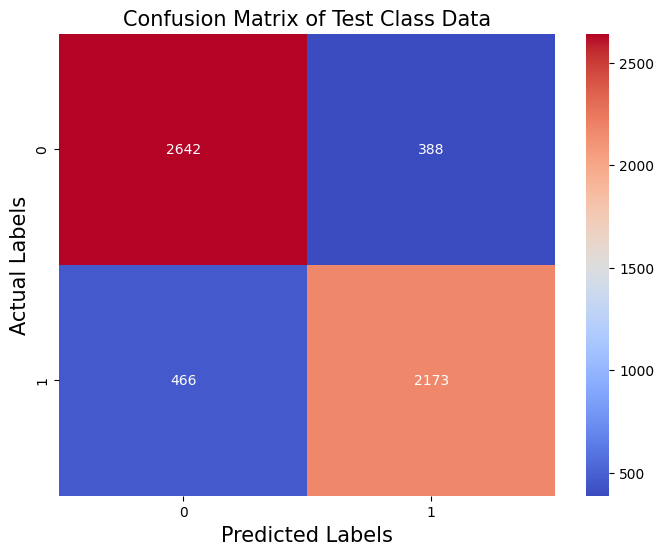

In [94]:
# Plot the confusion matrix of Test Class

plt.figure(figsize=(8,6))
confuse_matrix_test_lr = confusion_matrix(y_test,test_class_preds)

ax= plt.subplot()
sns.heatmap(confuse_matrix_test_lr, annot=True, fmt = 'd',ax = ax,cmap='coolwarm')
ax.set_xlabel('Predicted Labels',fontsize=15)
ax.set_ylabel('Actual Labels',fontsize=15)
ax.set_title('Confusion Matrix of Test Class Data',fontsize=15)
plt.plot()

In [95]:
# Visualizing evaluation Metric Score chart
print("Training Data")
print(classification_report(y_train, train_class_preds))
print("\n")
print("Testing Data")
print(classification_report(y_test, test_class_preds))

Training Data
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85     12170
         1.0       0.84      0.82      0.83     10503

    accuracy                           0.84     22673
   macro avg       0.84      0.84      0.84     22673
weighted avg       0.84      0.84      0.84     22673



Testing Data
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      3030
         1.0       0.85      0.82      0.84      2639

    accuracy                           0.85      5669
   macro avg       0.85      0.85      0.85      5669
weighted avg       0.85      0.85      0.85      5669



#### Random Forest Classifier

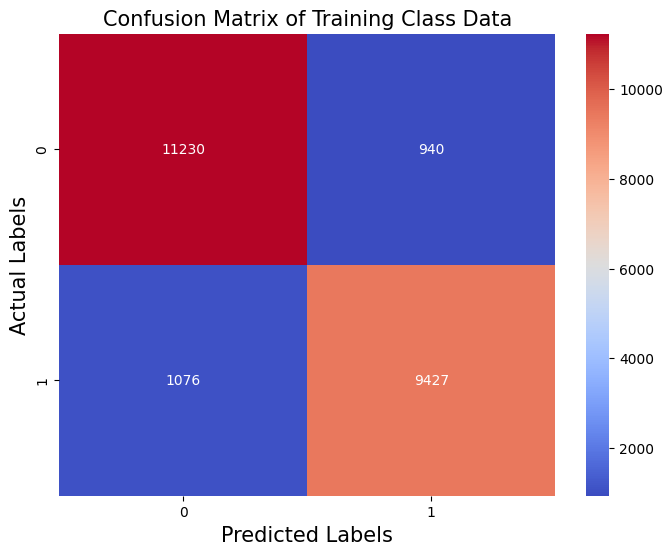

In [96]:
# Plot the confusion matrix of Training Class
plt.figure(figsize=(8,6))
confuse_matrix_train_rf = confusion_matrix(y_train,train_preds_rf)

ax= plt.subplot()
sns.heatmap(confuse_matrix_train_rf, annot=True, fmt = 'd', ax = ax, cmap='coolwarm')  # Added 'cmap' parameter
ax.set_xlabel('Predicted Labels',fontsize=15)
ax.set_ylabel('Actual Labels',fontsize=15)
ax.set_title('Confusion Matrix of Training Class Data',fontsize=15)
plt.show()  # Changed from plt.plot() to plt.show()

[]

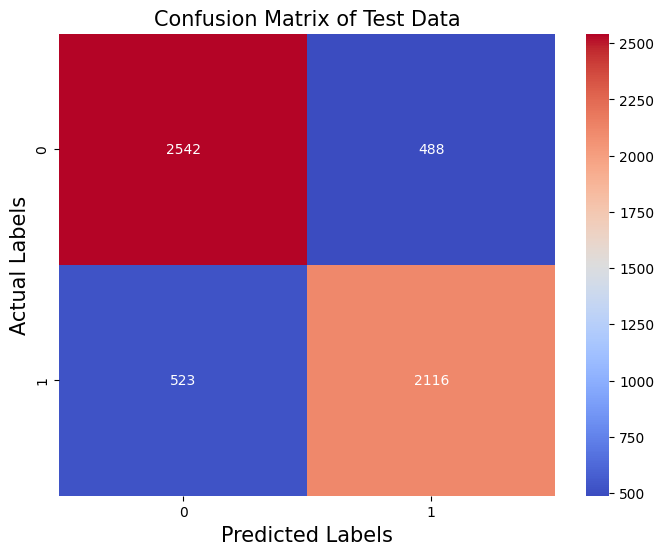

In [97]:
# Plot the confusion matrix of Testing Class

plt.figure(figsize=(8,6))
confuse_matrix_test_rf = confusion_matrix(y_test,test_preds_rf)

ax= plt.subplot()
sns.heatmap(confuse_matrix_test_rf, annot=True, fmt = 'd',ax = ax,cmap='coolwarm')
ax.set_xlabel('Predicted Labels',fontsize=15)
ax.set_ylabel('Actual Labels',fontsize=15)
ax.set_title('Confusion Matrix of Test Data',fontsize=15)
plt.plot()

In [98]:
# Visualizing evaluation Metric Score chart

print("Training Data")
print(classification_report(y_train, train_preds_rf))
print("\n")
print("Testing Data")
print(classification_report(y_test, test_preds_rf))

Training Data
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92     12170
         1.0       0.91      0.90      0.90     10503

    accuracy                           0.91     22673
   macro avg       0.91      0.91      0.91     22673
weighted avg       0.91      0.91      0.91     22673



Testing Data
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83      3030
         1.0       0.81      0.80      0.81      2639

    accuracy                           0.82      5669
   macro avg       0.82      0.82      0.82      5669
weighted avg       0.82      0.82      0.82      5669



#### SVM Classifier

[]

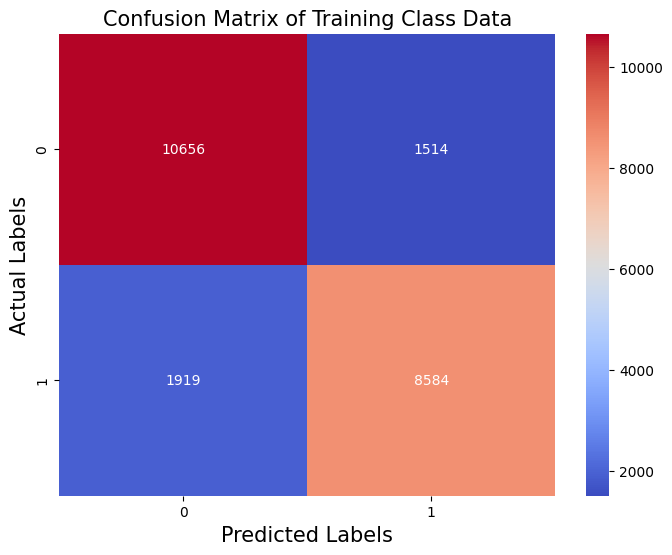

In [99]:
# Plot the confusion matrix of Training Class

plt.figure(figsize=(8,6))
confuse_matrix_train_svc = confusion_matrix(y_train,train_preds_svc)

ax= plt.subplot()
sns.heatmap(confuse_matrix_train_svc, annot=True, fmt = 'd',ax = ax, cmap='coolwarm')
ax.set_xlabel('Predicted Labels',fontsize=15)
ax.set_ylabel('Actual Labels',fontsize=15)
ax.set_title('Confusion Matrix of Training Class Data',fontsize=15)
plt.plot()

[]

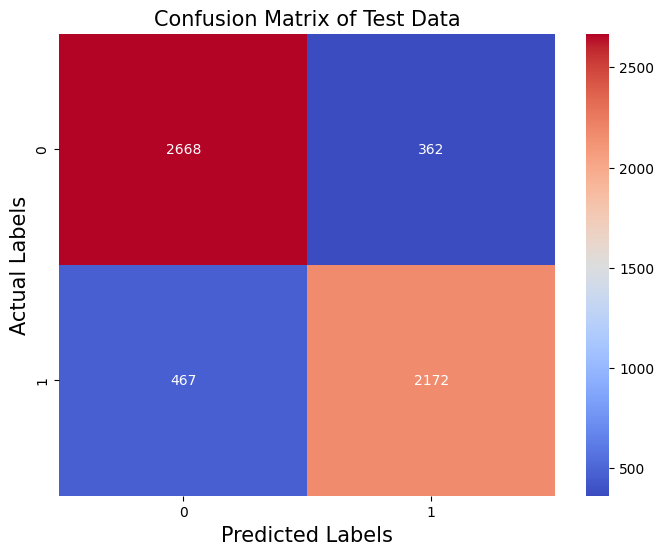

In [100]:
# Plot the confusion matrix of Testing Class

plt.figure(figsize=(8,6))
confuse_matrix_test_svc = confusion_matrix(y_test,test_preds_svc)

ax= plt.subplot()
sns.heatmap(confuse_matrix_test_svc, annot=True, fmt = 'd',ax = ax, cmap='coolwarm')
ax.set_xlabel('Predicted Labels',fontsize=15)
ax.set_ylabel('Actual Labels',fontsize=15)
ax.set_title('Confusion Matrix of Test Data',fontsize=15)
plt.plot()

In [101]:
# Visualizing evaluation Metric Score chart
print("Training Data")
print(classification_report(y_train, train_preds_svc))
print("\n")
print("Testing Data")
print(classification_report(y_test, test_preds_svc))

Training Data
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86     12170
         1.0       0.85      0.82      0.83     10503

    accuracy                           0.85     22673
   macro avg       0.85      0.85      0.85     22673
weighted avg       0.85      0.85      0.85     22673



Testing Data
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      3030
         1.0       0.86      0.82      0.84      2639

    accuracy                           0.85      5669
   macro avg       0.85      0.85      0.85      5669
weighted avg       0.85      0.85      0.85      5669



## **ROC Curver**

#### Logistic Regression

In [102]:
model_lr=LogisticRegression(C=0.1, l1_ratio=0.6, penalty='elasticnet', solver= 'saga')
model_lr.fit(X_train,y_train)

LogisticRegression(C=0.1, l1_ratio=0.6, penalty='elasticnet', solver='saga')

In [103]:
y_pred_proba_lr=model_lr.predict_proba(X_test)[:,1]

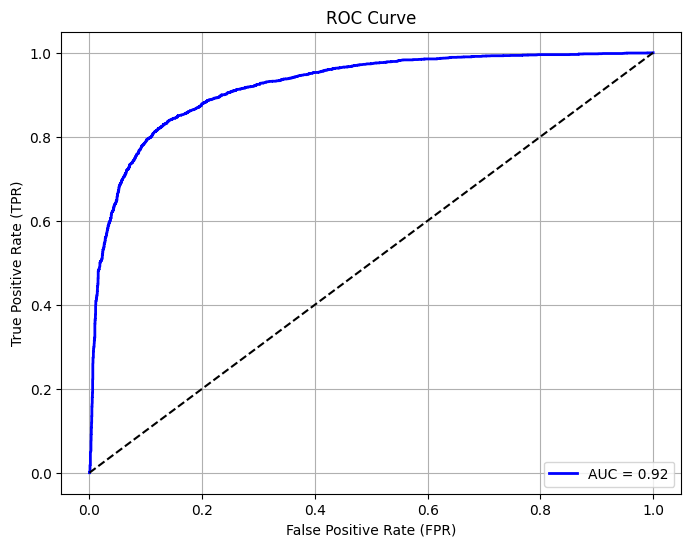

In [104]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Random Forest Classifier

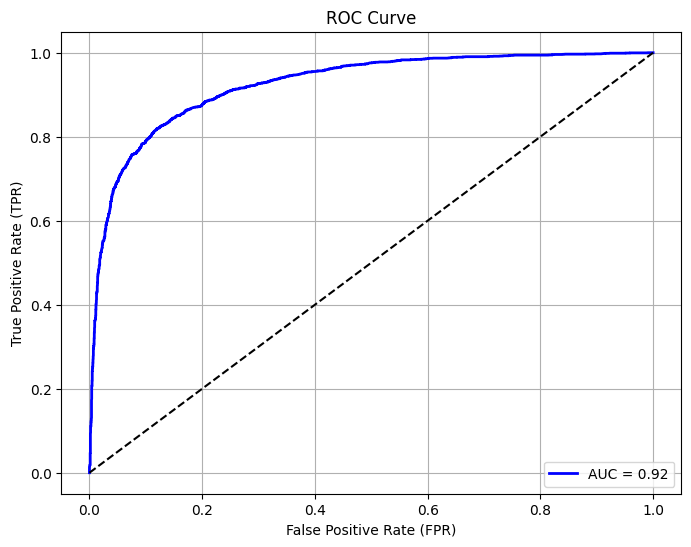

In [105]:
model_rf=RandomForestClassifier(max_depth= 8,max_samples= 0.5,random_state=42)
model_rf.fit(X_train,y_train)
# Predict probabilities on the test set
y_pred_proba_rf=model_rf.predict_proba(X_test)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

#Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### SVM Classifier

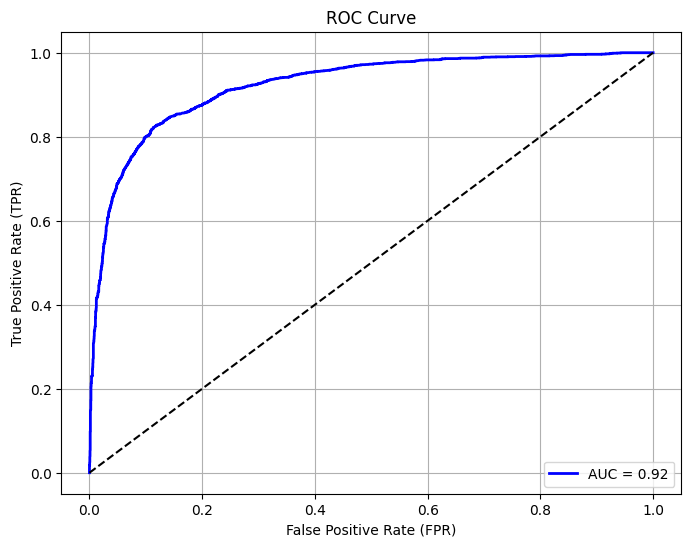

In [106]:
model_svc=SVC(kernel='rbf',degree=3,C=0.1,gamma='scale',probability=True)
model_svc.fit(X_train,y_train)
y_pred_proba=model_svc.predict_proba(X_test)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [107]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 3.0 MB/s eta 0:00:00


In [108]:
import eli5
from eli5.sklearn import PermutationImportance

# Linear Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

perm_importance_lr = PermutationImportance(model_lr, random_state=42).fit(X_test, y_test)

# Random Forest Regressor
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

perm_importance_rf = PermutationImportance(model_rf, random_state=42).fit(X_test, y_test)

# XGBoost Regressor
model_svc = SVC()
model_svc.fit(X_train, y_train)

perm_importance_svc = PermutationImportance(model_svc, random_state=42).fit(X_test, y_test)

In [109]:
# Print model
print("Logistic Regression Model")
eli5.show_weights(perm_importance_lr, feature_names=X_test.columns.tolist())

Logistic Regression Model


Weight,Feature
0.0786 ± 0.0078,cabin_service
0.0743 ± 0.0044,ground_service
0.0487 ± 0.0057,seat_comfort
0.0221 ± 0.0027,food_bev
0.0038 ± 0.0029,entertainment
0.0020 ± 0.0013,Solo Leisure
0.0011 ± 0.0009,Couple Leisure
0.0005 ± 0.0002,Family Leisure
-0.0008 ± 0.0015,cabin


In [110]:
# Print model
print("Random Forest Classifier Model")
eli5.show_weights(perm_importance_rf, feature_names=X_test.columns.tolist())

Random Forest Classifier Model


Weight,Feature
0.0803 ± 0.0044,ground_service
0.0753 ± 0.0066,cabin_service
0.0503 ± 0.0020,seat_comfort
0.0293 ± 0.0034,food_bev
0.0033 ± 0.0049,entertainment
0.0013 ± 0.0015,Family Leisure
-0.0018 ± 0.0024,Solo Leisure
-0.0018 ± 0.0020,Couple Leisure
-0.0042 ± 0.0051,cabin


In [111]:
# Print model
print("SVM Classifier Model")
eli5.show_weights(perm_importance_svc, feature_names=X_test.columns.tolist())

SVM Classifier Model


Weight,Feature
0.0956 ± 0.0089,cabin_service
0.0849 ± 0.0030,ground_service
0.0541 ± 0.0064,seat_comfort
0.0258 ± 0.0014,food_bev
0.0068 ± 0.0014,entertainment
0.0019 ± 0.0015,Family Leisure
0.0012 ± 0.0020,Couple Leisure
-0.0004 ± 0.0017,cabin
-0.0008 ± 0.0005,Solo Leisure


In [112]:
!pip install joblib

In [113]:
# Save the File
import joblib

#Random Forest Regressor model
best_model = model_svc

# Specify the file path to save the model
model_filename = 'best_model_svc.joblib'

# Save the model to the file
joblib.dump(best_model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as best_model_svc.joblib


In [114]:
# Load the File and predict unseen data.
loaded_model = joblib.load(model_filename)
# Now, you can use loaded_model for predictions